In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [43]:
start ='2021-01-01'
end = '2022-03-29'

df = data.DataReader('^NSEI','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,14049.849609,13991.349609,13996.099609,14018.500000,358100,14018.500000
2021-01-04,14147.950195,13953.750000,14104.349609,14132.900391,495000,14132.900391
2021-01-05,14215.599609,14048.150391,14075.150391,14199.500000,492500,14199.500000
2021-01-06,14244.150391,14039.900391,14240.950195,14146.250000,632300,14146.250000
2021-01-07,14256.250000,14123.099609,14253.750000,14137.349609,559200,14137.349609


In [44]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-23,17442.400391,17199.599609,17405.050781,17245.650391,292100,17245.650391
2022-03-24,17291.750000,17091.150391,17094.949219,17222.750000,290300,17222.750000
2022-03-25,17294.900391,17076.550781,17289.000000,17153.000000,237100,17153.000000
2022-03-28,17235.099609,17003.900391,17181.849609,17222.000000,253200,17222.000000
2022-03-29,17343.650391,17235.699219,17297.199219,17325.300781,235100,17325.300781


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-01-01,14049.849609,13991.349609,13996.099609,14018.500000,358100,14018.500000
1,2021-01-04,14147.950195,13953.750000,14104.349609,14132.900391,495000,14132.900391
2,2021-01-05,14215.599609,14048.150391,14075.150391,14199.500000,492500,14199.500000
3,2021-01-06,14244.150391,14039.900391,14240.950195,14146.250000,632300,14146.250000
4,2021-01-07,14256.250000,14123.099609,14253.750000,14137.349609,559200,14137.349609


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,14049.849609,13991.349609,13996.099609,14018.500000,358100
1,14147.950195,13953.750000,14104.349609,14132.900391,495000
2,14215.599609,14048.150391,14075.150391,14199.500000,492500
3,14244.150391,14039.900391,14240.950195,14146.250000,632300
4,14256.250000,14123.099609,14253.750000,14137.349609,559200


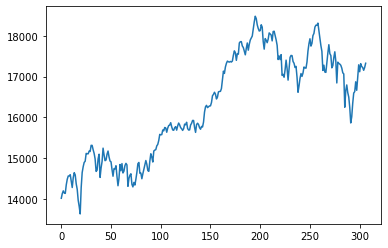

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,14049.849609,13991.349609,13996.099609,14018.500000,358100
1,14147.950195,13953.750000,14104.349609,14132.900391,495000
2,14215.599609,14048.150391,14075.150391,14199.500000,492500
3,14244.150391,14039.900391,14240.950195,14146.250000,632300
4,14256.250000,14123.099609,14253.750000,14137.349609,559200
...,...,...,...,...,...
302,17442.400391,17199.599609,17405.050781,17245.650391,292100
303,17291.750000,17091.150391,17094.949219,17222.750000,290300
304,17294.900391,17076.550781,17289.000000,17153.000000,237100
305,17235.099609,17003.900391,17181.849609,17222.000000,253200


In [8]:
ma100 =df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
302    17351.182949
303    17344.837949
304    17339.651445
305    17332.574941
306    17326.938457
Name: Close, Length: 307, dtype: float64

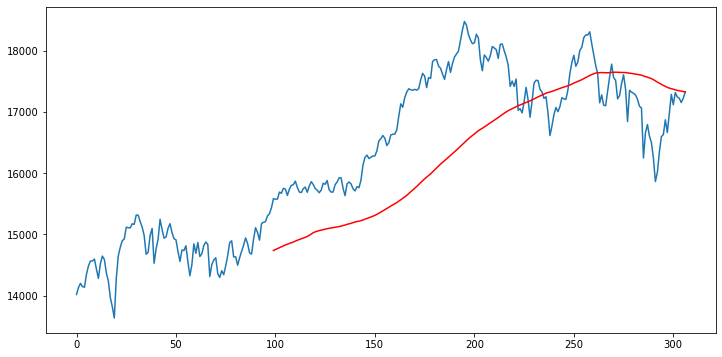

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200 =df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
302    17021.494468
303    17029.256968
304    17036.263716
305    17043.673218
306    17052.122974
Name: Close, Length: 307, dtype: float64

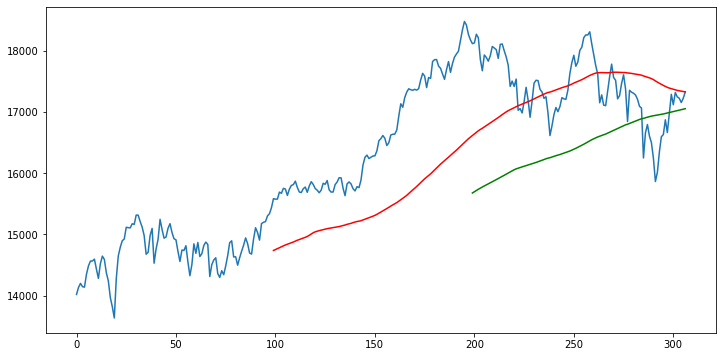

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(307, 5)

In [13]:
# spliting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(214, 1)
(93, 1)


In [14]:
data_training.head()

,Close
0,14018.500000
1,14132.900391
2,14199.500000
3,14146.250000
4,14137.349609


In [15]:
data_testing.head()

,Close
214,18109.449219
215,17999.199219
216,17898.650391
217,17764.800781
218,17416.550781


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.07927811],
       [0.10290259],
       [0.11665588],
       [0.10565938],
       [0.10382139],
       [0.14716728],
       [0.175562  ],
       [0.19181414],
       [0.19210312],
       [0.19845321],
       [0.16501985],
       [0.13354811],
       [0.18307893],
       [0.20859283],
       [0.19736905],
       [0.15225776],
       [0.12479233],
       [0.06874626],
       [0.03778049],
       [0.        ],
       [0.13352754],
       [0.2092432 ],
       [0.23858797],
       [0.2604158 ],
       [0.26632182],
       [0.30587819],
       [0.30453589],
       [0.30395771],
       [0.31775234],
       [0.31568727],
       [0.34695251],
       [0.34669438],
       [0.32510411],
       [0.30652877],
       [0.27819597],
       [0.21499454],
       [0.22162334],
       [0.27824759],
       [0.30206809],
       [0.18473099],
       [0.23272309],
       [0.26525822],
       [0.33268276],
       [0.29864016],
       [0.26918186],
       [0.27291975],
       [0.30228509],
       [0.318

In [18]:
data_training_array.shape

(214, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(114, 100, 1)

In [21]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential



In [22]:
model = Sequential()

model.add(LSTM(units =50, activation = 'relu', return_sequences = True, 
               input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units =60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units =80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units =120, activation = 'relu'))
model.add(Dropout(0.5))




model.add(Dense(units = 1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
4/4 [==============================] - 17s 367ms/step - loss: 0.4382
Epoch 2/50
4/4 [==============================] - 2s 431ms/step - loss: 0.2915
Epoch 3/50
4/4 [==============================] - 2s 463ms/step - loss: 0.1553
Epoch 4/50
4/4 [==============================] - 2s 376ms/step - loss: 0.0376
Epoch 5/50
4/4 [==============================] - 2s 369ms/step - loss: 0.1021
Epoch 6/50
4/4 [==============================] - 1s 297ms/step - loss: 0.1045
Epoch 7/50
4/4 [==============================] - 1s 296ms/step - loss: 0.0731
Epoch 8/50
4/4 [==============================] - 1s 372ms/step - loss: 0.0217
Epoch 9/50
4/4 [==============================] - 1s 325ms/step - loss: 0.0303
Epoch 10/50
4/4 [==============================] - 1s 288ms/step - loss: 0.0321
Epoch 11/50
4/4 [==============================] - 1s 286ms/step - loss: 0.0223
Epoch 12/50
4/4 [==============================] - 1s 365ms/step - loss: 0.0240
Epoch 13/50
4/4 [==============================]

In [25]:
model.save('keras_model.h5')

In [26]:
data_testing.head()

,Close
214,18109.449219
215,17999.199219
216,17898.650391
217,17764.800781
218,17416.550781


In [27]:
data_training.tail(100)

,Close
114,15746.500000
115,15772.750000
116,15686.950195
117,15790.450195
118,15860.349609
...,...
209,18068.550781
210,18044.250000
211,18017.199219
212,17873.599609


In [28]:
past_100_days = data_training.tail(100)

In [29]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [30]:
final_df.head()

,Close
0,15746.500000
1,15772.750000
2,15686.950195
3,15790.450195
4,15860.349609


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.04021172],
       [0.0494386 ],
       [0.01927997],
       [0.05566021],
       [0.08022985],
       [0.06418408],
       [0.04089722],
       [0.03142423],
       [0.01683698],
       [0.03167035],
       [0.07109085],
       [0.06543184],
       [0.08701407],
       [0.03367396],
       [0.02028161],
       [0.02126574],
       [0.06335785],
       [0.07798045],
       [0.10267332],
       [0.10239219],
       [0.04228571],
       [0.        ],
       [0.06747047],
       [0.07871847],
       [0.06761121],
       [0.04019422],
       [0.02717122],
       [0.05144221],
       [0.04602898],
       [0.08894732],
       [0.17527555],
       [0.22028504],
       [0.23286867],
       [0.21304428],
       [0.22009179],
       [0.22777192],
       [0.22852779],
       [0.25740364],
       [0.31529539],
       [0.32722923],
       [0.34534863],
       [0.32926751],
       [0.28766764],
       [0.30381879],
       [0.34886363],
       [0.35239648],
       [0.35318736],
       [0.377

In [32]:
input_data.shape

(193, 1)

In [33]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [34]:
x_test, y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(93, 100, 1)
(93,)


In [35]:
# making predictions

y_predicted = model.predict(x_test)

In [36]:
y_predicted.shape

(93, 1)

In [37]:
y_test

array([0.87078809, 0.83203523, 0.79669233, 0.74964421, 0.62723438,
       0.65774415, 0.62670713, 0.66930864, 0.49011372, 0.49977997,
       0.47491135, 0.53948229, 0.62199689, 0.54995658, 0.44997271,
       0.54292658, 0.64593389, 0.6624894 , 0.66053899, 0.61025666,
       0.59501927, 0.55863904, 0.56812953, 0.47561435, 0.3452079 ,
       0.40027049, 0.46515723, 0.50633558, 0.48213495, 0.51113369,
       0.56280417, 0.55589706, 0.55250495, 0.60526563, 0.70075003,
       0.7638621 , 0.80604209, 0.74300072, 0.7664805 , 0.83347693,
       0.85191283, 0.90695757, 0.92293365, 0.9222128 , 0.94061368,
       0.87205404, 0.81066445, 0.74690224, 0.69774511, 0.53322532,
       0.57851594, 0.51953467, 0.51665196, 0.60027392, 0.68357939,
       0.75498673, 0.67772678, 0.66229649, 0.55589706, 0.57457942,
       0.64384274, 0.69377289, 0.61254141, 0.42556132, 0.60470268,
       0.59406981, 0.58788355, 0.57793652, 0.55345441, 0.51322484,
       0.50304919, 0.21647141, 0.3607446 , 0.40837284, 0.34230

In [38]:
y_predicted

array([[0.85769343],
       [0.85875213],
       [0.85952806],
       [0.86007124],
       [0.8603627 ],
       [0.86025774],
       [0.8596004 ],
       [0.8582379 ],
       [0.85608876],
       [0.85301507],
       [0.8488714 ],
       [0.8435378 ],
       [0.8370094 ],
       [0.82943225],
       [0.82098097],
       [0.81175613],
       [0.80191356],
       [0.7917118 ],
       [0.78145903],
       [0.7714507 ],
       [0.76190567],
       [0.75296533],
       [0.7446847 ],
       [0.73706967],
       [0.7300199 ],
       [0.72326785],
       [0.71653795],
       [0.7096552 ],
       [0.7025653 ],
       [0.69526994],
       [0.68783677],
       [0.6804153 ],
       [0.67317885],
       [0.6662923 ],
       [0.6599407 ],
       [0.6543586 ],
       [0.6498087 ],
       [0.6465464 ],
       [0.6447256 ],
       [0.6444204 ],
       [0.6456756 ],
       [0.64850056],
       [0.65289533],
       [0.6588308 ],
       [0.6662464 ],
       [0.6750485 ],
       [0.6850562 ],
       [0.695

In [39]:
scaler.scale_

array([0.0003515])

In [40]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

<function matplotlib.pyplot.show(*args, **kw)>

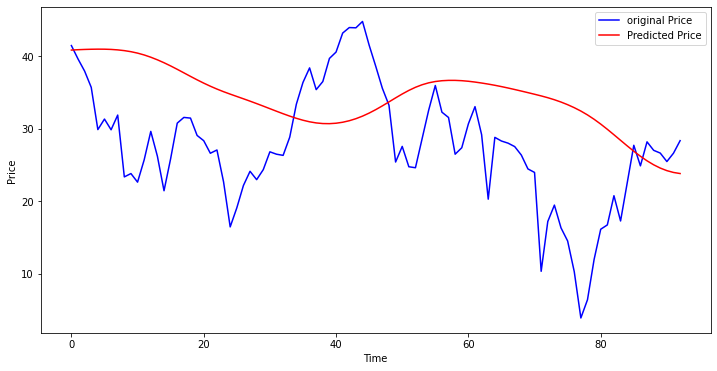

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show